## ESERCIZIO 12

in questa esercitazione sviluppiamo un algoritmo, che sfrutta le reti neurali, in grado di riconoscere i numeri scritti a mano.

In [29]:
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import backend, activations
from tensorflow.keras import optimizers, losses, metrics
from keras.datasets import mnist

In [30]:
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

60000 train samples
10000 test samples

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


X_train shape: (60000, 784)
Y_train shape: (60000, 10)


### ESERCIZIO 12.1

in questo esercizio viene usato un algoritmo che trasforma le immagini dei numeri scritti a mano in vettori unidimensionali.

abbiamo testato l'algoritmo per 3 tipi di ottimizzatori diversi:
- Stocastic gradient descend (SGD)
- Adadelta
- RMSprop

sotto sono riportate le performance ottenute con i diversi tipi di ottimizzatori.

si può notare che le migliori performance sono state ottenute con l'uso dell'SGD come ottimizzatore, quindi nel seguito continueremo ad usare questo.

Epoch 1/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.6967 - acc: 0.7948 - val_loss: 0.2892 - val_acc: 0.9200
Epoch 2/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.3557 - acc: 0.8984 - val_loss: 0.2252 - val_acc: 0.9327
Epoch 3/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.2867 - acc: 0.9185 - val_loss: 0.1872 - val_acc: 0.9438
Epoch 4/10
2400/2400 [==============================] - 9s 4ms/step - loss: 0.2426 - acc: 0.9307 - val_loss: 0.1595 - val_acc: 0.9516
Epoch 5/10
2400/2400 [==============================] - 9s 4ms/step - loss: 0.2139 - acc: 0.9402 - val_loss: 0.1437 - val_acc: 0.9561
Epoch 6/10
2400/2400 [==============================] - 9s 4ms/step - loss: 0.1899 - acc: 0.9473 - val_loss: 0.1287 - val_acc: 0.9600
Epoch 7/10
2400/2400 [==============================] - 9s 4ms/step - loss: 0.1725 - acc: 0.9509 - val_loss: 0.1169 - val_acc: 0.9634
Epoch 8/10
2400/2400 [==============================] - 9s 4ms

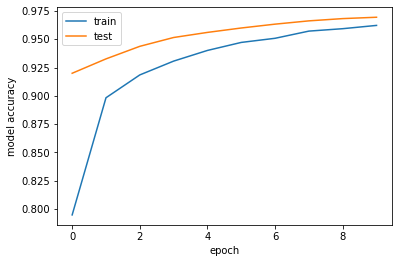

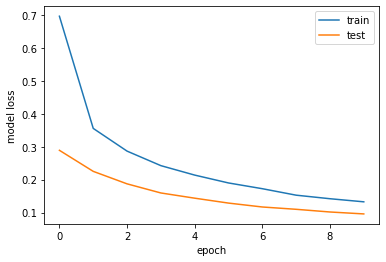

In [25]:
##SGD

model1 = Sequential()
model1.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
model1.add(Dense(100, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(optimizer='sgd', loss=keras.losses.categorical_crossentropy, metrics=['acc'])
#altri ottimizzatori: SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam


history1 = model1.fit(X_train, Y_train,
          batch_size=25,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model1.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Epoch 1/10
2400/2400 [==============================] - 12s 5ms/step - loss: 2.2561 - acc: 0.1626 - val_loss: 2.1080 - val_acc: 0.3446
Epoch 2/10
2400/2400 [==============================] - 12s 5ms/step - loss: 2.0699 - acc: 0.2946 - val_loss: 1.9320 - val_acc: 0.5718
Epoch 3/10
2400/2400 [==============================] - 12s 5ms/step - loss: 1.9079 - acc: 0.4205 - val_loss: 1.7622 - val_acc: 0.6866
Epoch 4/10
2400/2400 [==============================] - 13s 5ms/step - loss: 1.7579 - acc: 0.5056 - val_loss: 1.5966 - val_acc: 0.7419
Epoch 5/10
2400/2400 [==============================] - 12s 5ms/step - loss: 1.6195 - acc: 0.5658 - val_loss: 1.4395 - val_acc: 0.7729
Epoch 6/10
2400/2400 [==============================] - 12s 5ms/step - loss: 1.4870 - acc: 0.6084 - val_loss: 1.2954 - val_acc: 0.7953
Epoch 7/10
2400/2400 [==============================] - 11s 5ms/step - loss: 1.3721 - acc: 0.6394 - val_loss: 1.1696 - val_acc: 0.8105
Epoch 8/10
2400/2400 [==============================] -

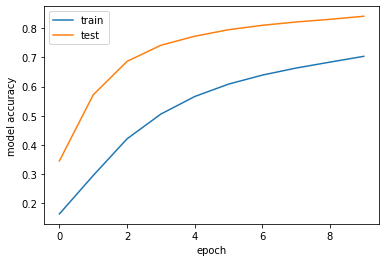

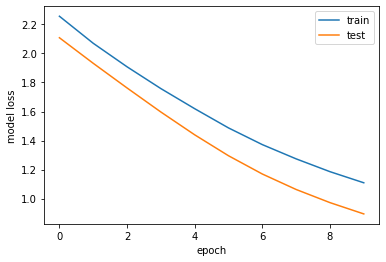

In [26]:
##ADADELTA

model2 = Sequential()
model2.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(optimizer='adadelta', loss=keras.losses.categorical_crossentropy, metrics=['acc'])
#altri ottimizzatori: SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam


history2 = model2.fit(X_train, Y_train,
          batch_size=25,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model2.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Epoch 1/10
2400/2400 [==============================] - 14s 6ms/step - loss: 0.2816 - acc: 0.9206 - val_loss: 0.1456 - val_acc: 0.9628
Epoch 2/10
2400/2400 [==============================] - 13s 6ms/step - loss: 0.1742 - acc: 0.9587 - val_loss: 0.1644 - val_acc: 0.9653
Epoch 3/10
2400/2400 [==============================] - 13s 5ms/step - loss: 0.1726 - acc: 0.9643 - val_loss: 0.1467 - val_acc: 0.9730
Epoch 4/10
2400/2400 [==============================] - 13s 5ms/step - loss: 0.1811 - acc: 0.9665 - val_loss: 0.1696 - val_acc: 0.9734
Epoch 5/10
2400/2400 [==============================] - 13s 5ms/step - loss: 0.1844 - acc: 0.9664 - val_loss: 0.2277 - val_acc: 0.9725
Epoch 6/10
2400/2400 [==============================] - 13s 6ms/step - loss: 0.2024 - acc: 0.9667 - val_loss: 0.2318 - val_acc: 0.9701
Epoch 7/10
2400/2400 [==============================] - 14s 6ms/step - loss: 0.2097 - acc: 0.9668 - val_loss: 0.2311 - val_acc: 0.9736
Epoch 8/10
2400/2400 [==============================] -

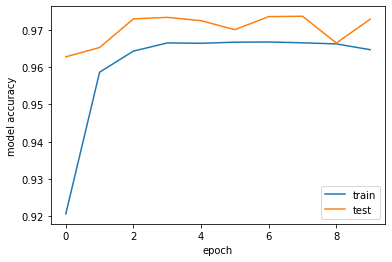

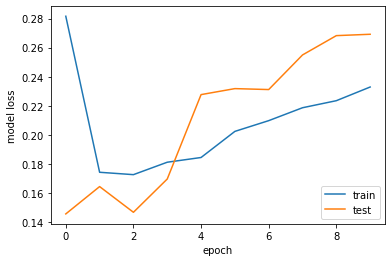

In [27]:
##RMSPROP

model3 = Sequential()
model3.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
model3.add(Dense(100, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(optimizer='RMSprop', loss=keras.losses.categorical_crossentropy, metrics=['acc'])
#altri ottimizzatori: SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam


history3 = model3.fit(X_train, Y_train,
          batch_size=25,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model3.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### ESERCIZIO 12.2 

in questro esercizio dobbiamo creare una rete neurale convoluzionale. diversamente dall'algoritmo scritto in precedenza questo usa direttamente i dati in 2D.

in pratica per creare una rete di questo tipo, bisogna ridurre poco a poco la dimensione della matrice 2D tramite l'alternanza di layer convoluzionali e di pooling, in seguito bisogna passare ad un layer 1D e infine ottenere un output di 10 neuroni (uno per cifra da riconoscere).

In [32]:
#RESHAPE DEI DATI (1D->2D)

# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [38]:
#CREAZIONE DELLA RETE CONVOLUZIONALE E COMPILAZIONE

model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(16, kernel_size=(5, 5)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.5))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation='softmax'))


    
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='sgd', metrics=['acc'])

history=model.fit(X_train, Y_train,
          batch_size=25,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
2400/2400 [==============================] - 28s 11ms/step - loss: 0.4976 - acc: 0.8396 - val_loss: 0.1398 - val_acc: 0.9563
Epoch 2/10
2400/2400 [==============================] - 29s 12ms/step - loss: 0.1626 - acc: 0.9509 - val_loss: 0.0809 - val_acc: 0.9756
Epoch 3/10
2400/2400 [==============================] - 29s 12ms/step - loss: 0.1159 - acc: 0.9646 - val_loss: 0.0596 - val_acc: 0.9803
Epoch 4/10
2400/2400 [==============================] - 27s 11ms/step - loss: 0.0928 - acc: 0.9718 - val_loss: 0.0492 - val_acc: 0.9848
Epoch 5/10
2400/2400 [==============================] - 28s 12ms/step - loss: 0.0816 - acc: 0.9744 - val_loss: 0.0478 - val_acc: 0.9849
Epoch 6/10
2400/2400 [==============================] - 29s 12ms/step - loss: 0.0703 - acc: 0.9788 - val_loss: 0.0400 - val_acc: 0.9871
Epoch 7/10
2400/2400 [==============================] - 33s 14ms/step - loss: 0.0635 - acc: 0.9801 - val_loss: 0.0379 - val_acc: 0.9870
Epoch 8/10
2400/2400 [==========================

313/313 [==============================] - 2s 5ms/step - loss: 0.0314 - acc: 0.9891

Test loss: 0.03139699250459671
Test accuracy: 0.9890999794006348


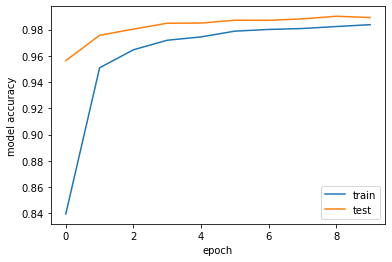

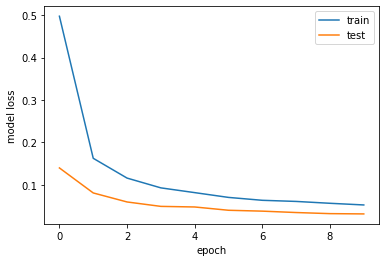

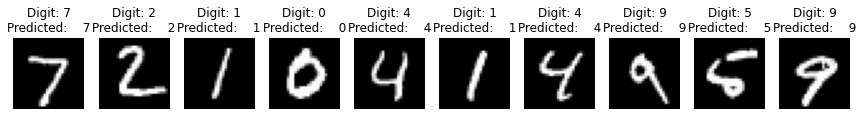

In [39]:
#VALUTAZIONE DEL MODELLO 


# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


##PREDIZIONI 

predictions = model.predict(X_test)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## ESERCIZIO 12.3 

in questo esercizio testiamo l'algoritmo appena implementato su numeri scritti a mano direttamente da noi.

per quanto riguarda i numeri scritti da me l'algortmo predice in modo giusto il 100% delle cifre

(28, 28, 3)
(28, 28)
Digit predicted:    9


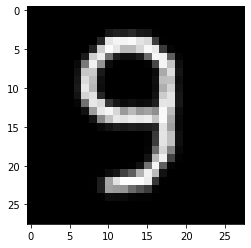

In [51]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('cifre/9.png')
print(img.shape)
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
gray=rgb2gray(img)
print(gray.shape)
gray = gray.reshape(1,28,28,1)
pred = model.predict(gray)
print("Digit predicted:    {}".format(np.argmax(pred)))
imgplot = plt.imshow(img)
plt.show()